This note studies the correlation between the radio-to-optical offset (angular separation $\rho$ and normalized separation $X$) and the color ($B-R$).

- $\rho$ vs $BP-RP$

- $X$ vs $BP-RP$

In [1]:
from astropy.table import Table, join
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Radio-to-optical offset
r2o= Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

# Gaia DR2 photometric information
from my_progs.catalog.read_gaia import read_dr2_iers
gdr2 = read_dr2_iers()
gdr2.keep_columns(["iers_name", "source_id",  "bp_rp"])

# Cross-match
r2o = join(r2o, gdr2, keys="iers_name")

# Remove sources with BP-RP information
mask = np.isfinite(r2o["bp_rp"])
r2o = r2o[mask]

print("{} sources are given for color information.".format(len(r2o)))

482 sources are given for color information.


# 1. Overall distribution of magnitude

First, we look at the distribution of the magnitude.

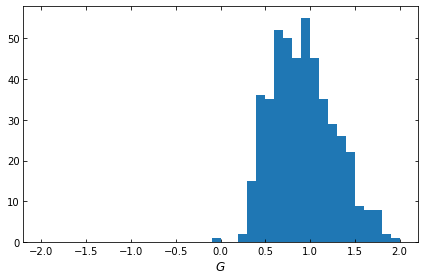

In [3]:
fig, ax = plt.subplots()

bins = np.arange(-1, 2.1, 0.1)

ax.hist(r2o["bp_rp"], bins=bins)
ax.set_xlabel("$G$", fontsize=12)

plt.tight_layout()

# 2 angular separation $\rho$ vs. Color

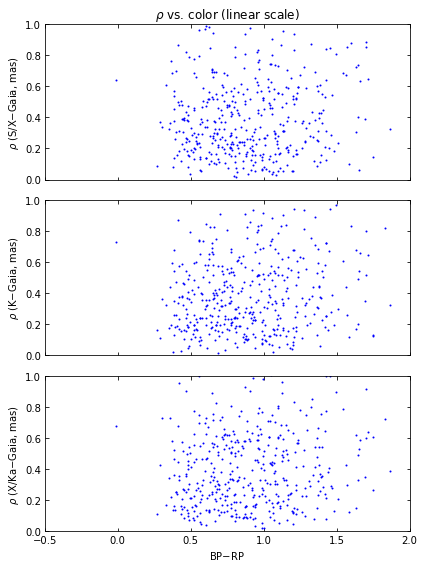

In [4]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(r2o["bp_rp"], r2o["ang_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o["bp_rp"], r2o["ang_sep_k_1"], ".b", ms=2)
ax2.plot(r2o["bp_rp"], r2o["ang_sep_ka_1"], "b.", ms=2)

# ax0.plot(dat_binned["g_mag"], dat_binned)
ax0.set_xlim([-0.5, 2])
ax0.set_ylim([0, 1])

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)")
ax1.set_ylabel("$\\rho$ (K$-$Gaia, mas)")
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)")
ax2.set_xlabel("BP$-$RP")

ax0.set_title("$\\rho$ vs. color (linear scale)")

plt.subplots_adjust()
plt.tight_layout()

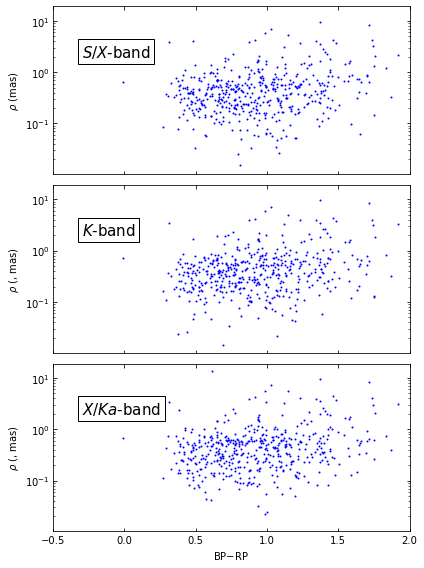

In [5]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(r2o["bp_rp"], r2o["ang_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o["bp_rp"], r2o["ang_sep_k_1"], ".b", ms=2)
ax2.plot(r2o["bp_rp"], r2o["ang_sep_ka_1"], "b.", ms=2)

### TO-DO ###
# ADD BINNED plot
# ax0.plot(dat_binned["g_mag"], dat_binned)
### TO-DO ###

ax0.set_xlim([-0.5, 2])

ax0.set_ylabel("$\\rho$ (mas)")
ax1.set_ylabel("$\\rho$ (, mas)")
ax2.set_ylabel("$\\rho$ (, mas)")
ax2.set_xlabel("BP$-$RP")

lab_x, lab_y = -0.3, 2
ax0.text(lab_x, lab_y, "$S/X$-band", fontsize=15, bbox=dict(facecolor="none"))
ax1.text(lab_x, lab_y, "$K$-band", fontsize=15, bbox=dict(facecolor="none"))
ax2.text(lab_x, lab_y, "$X/Ka$-band", fontsize=15, bbox=dict(facecolor="none"))

ax0.set_yscale("log")
ax1.set_yscale("log")
ax2.set_yscale("log")

plt.subplots_adjust()
plt.tight_layout()

# 2 normalized separation $X$ vs. color

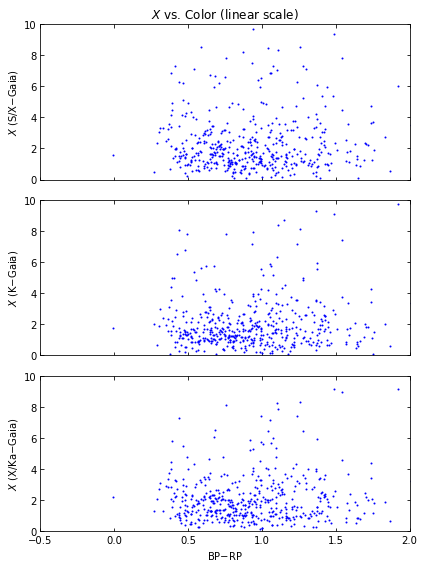

In [6]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(r2o["bp_rp"], r2o["nor_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o["bp_rp"], r2o["nor_sep_k_1"], "b.", ms=2)
ax2.plot(r2o["bp_rp"], r2o["nor_sep_ka_1"], "b.", ms=2)

ax0.set_xlim([-0.5, 2])
ax0.set_ylim([0, 10])

ax0.set_ylabel("$X$ (S/X$-$Gaia)")
ax1.set_ylabel("$X$ (K$-$Gaia)")
ax2.set_ylabel("$X$ (X/Ka$-$Gaia)")
ax2.set_xlabel("BP$-$RP")
ax0.set_title("$X$ vs. Color (linear scale)")

plt.subplots_adjust()
plt.tight_layout()

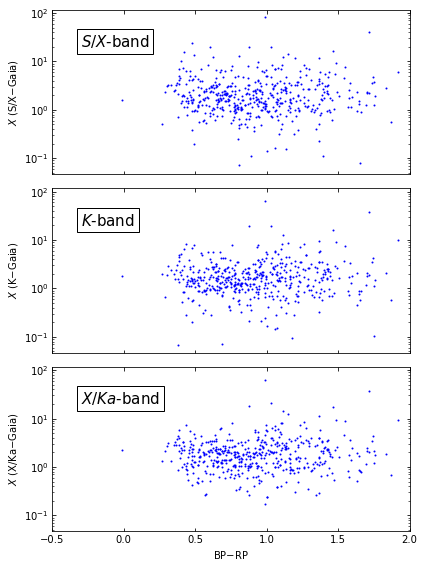

In [7]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(r2o["bp_rp"], r2o["nor_sep_sx_1"], "b.", ms=2)
ax1.plot(r2o["bp_rp"], r2o["nor_sep_k_1"], "b.", ms=2)
ax2.plot(r2o["bp_rp"], r2o["nor_sep_ka_1"], "b.", ms=2)

ax0.set_xlim([-0.5, 2])

ax0.set_ylabel("$X$ (S/X$-$Gaia)")
ax1.set_ylabel("$X$ (K$-$Gaia)")
ax2.set_ylabel("$X$ (X/Ka$-$Gaia)")
ax2.set_xlabel("BP$-$RP")

ax0.set_yscale("log")
ax1.set_yscale("log")
ax2.set_yscale("log")

lab_x, lab_y = -0.3, 20
ax0.text(lab_x, lab_y, "$S/X$-band", fontsize=15, bbox=dict(facecolor="none"))
ax1.text(lab_x, lab_y, "$K$-band", fontsize=15, bbox=dict(facecolor="none"))
ax2.text(lab_x, lab_y, "$X/Ka$-band", fontsize=15, bbox=dict(facecolor="none"))

plt.subplots_adjust()
plt.tight_layout()

# 3 correlation test

I will perform the correlation test to check if the radio-to-optical offset is dependent on the color.

In [8]:
from CorrTest import R2OCorrTest

# Sort the table
r2o.sort("bp_rp")
mask = np.isfinite(r2o["bp_rp"])
r2o_c = r2o[mask]
r2o_c.keep_columns(["ang_sep_sx_1", "nor_sep_sx_1",
                    "ang_sep_k_1", "nor_sep_k_1",
                    "ang_sep_ka_1", "nor_sep_ka_1",
                    "bp_rp"])

print("Color information is available for {} sources.".format(len(r2o_c)))

Color information is available for 482 sources.


## 4.1 $\rho$ vs. BP$-$RP

In [9]:
# Array of bin size
bin_array = np.arange(1, 51, 2)

rho_corr, x_corr = R2OCorrTest(r2o_c, "bp_rp", bin_array)

/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


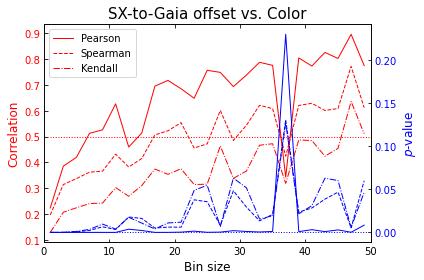

In [10]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia offset vs. Color", fontsize=15)
fig.tight_layout()

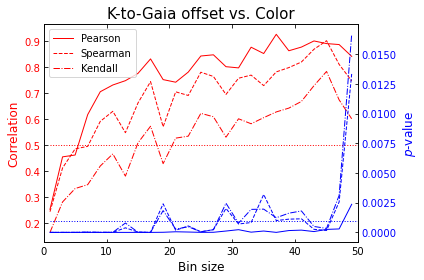

In [11]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia offset vs. Color", fontsize=15)
fig.tight_layout()

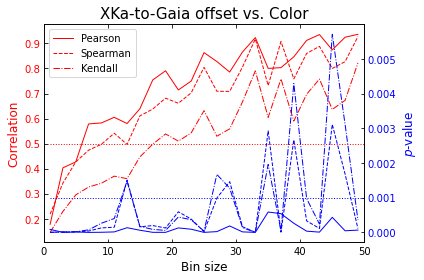

In [12]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, rho_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, rho_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, rho_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, rho_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, rho_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, rho_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia offset vs. Color", fontsize=15)
fig.tight_layout()

As seen from three plots above, the correlation between radio-to-optical distance and $G$ magnitude is solid.

## 4.2 $X$ vs. BP$-$RP

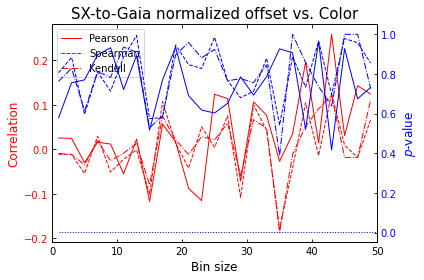

In [13]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_sx"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_sx"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_sx"], color="r", lw=1, ls="-.", label="Kendall")

# Critical value of correlation coefficient
# ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_sx"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_sx"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_sx"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("SX-to-Gaia normalized offset vs. Color", fontsize=15)
fig.tight_layout()

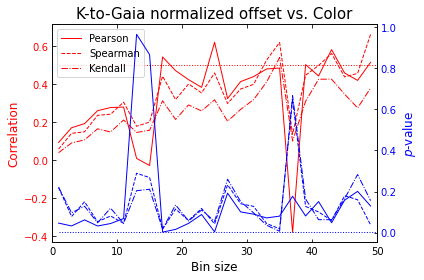

In [14]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_k"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_k"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_k"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_k"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_k"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_k"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("K-to-Gaia normalized offset vs. Color", fontsize=15)
fig.tight_layout()

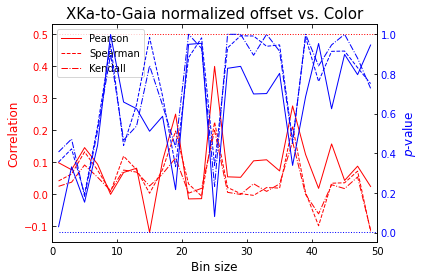

In [15]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Bin size", fontsize=12)
ax1.set_ylabel("Correlation", color="r", fontsize=12)
ax1.plot(bin_array, x_corr["r_ka"], color="r", lw=1, ls="-", label="Pearson")
ax1.plot(bin_array, x_corr["rs_ka"], color="r", lw=1, ls="--", label="Spearman")
ax1.plot(bin_array, x_corr["tau_ka"], color="r", lw=1, ls="-.", label="Kendall")
ax1.hlines(0.5, 1, 51, lw=1, color="r", ls=":")
ax1.tick_params(axis="y", labelcolor="r")
ax1.set_xlim([0, 50])
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("$p$-value", color="b", fontsize=12)
ax2.plot(bin_array, x_corr["rp_ka"], color="b", lw=1, ls="-", label="Pearson")
ax2.plot(bin_array, x_corr["rsp_ka"], color="b", lw=1, ls="--", label="Spearman")
ax2.plot(bin_array, x_corr["taup_ka"], color="b", lw=1, ls="-.", label="Kendall")

# Critical value of p-value
ax2.hlines(0.001, 1, 51, lw=1, color="b", ls=":")
ax2.tick_params(axis="y", labelcolor="b")

plt.title("XKa-to-Gaia normalized offset vs. Color", fontsize=15)
fig.tight_layout()